<a href="https://colab.research.google.com/github/vidhipatani/Lab0-PySpark/blob/main/ALY6110_VPATANI_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=86239815c671f2dab78e10472cc6779f0f190aa5b91812bfe6da2fae94ca62bc
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean, stddev
import matplotlib.pyplot as plt
from pyspark.sql.functions import when

In [3]:
# Step 1: Initialize Spark Session
spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Step 2: Load the Dataset
# Assuming the dataset is in a CSV file named 'boston_housing.csv'
df = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)

In [4]:
# Step 3: Data Preparation
# Remove rows with missing values
df = df.dropna()

# Display the schema of the DataFrame
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [5]:
# Step 4: Define Bins for RM (Average number of rooms per dwelling)
bins = [0, 4, 5, 6, 7, 8, float('inf')]
labels = ["<=4", "4-5", "5-6", "6-7", "7-8", ">8"]

# Create a new column 'RM_Bin' based on the bins
df = df.withColumn("RM_Bin",
                   when(col("rm") <= 4, "<=4")
                   .when((col("rm") > 4) & (col("rm") <= 5), "4-5")
                   .when((col("rm") > 5) & (col("rm") <= 6), "5-6")
                   .when((col("rm") > 6) & (col("rm") <= 7), "6-7")
                   .when((col("rm") > 7) & (col("rm") <= 8), "7-8")
                   .otherwise(">8"))

In [6]:
# Step 5: Calculate Statistics for Each Bin
statistics = df.groupBy("RM_Bin").agg(
    count("medv").alias("Count"),
    mean("medv").alias("Mean_MEDV"),
    stddev("medv").alias("StdDev_MEDV")
).orderBy("RM_Bin")

# Show the results
statistics.show()

+------+-----+------------------+------------------+
|RM_Bin|Count|         Mean_MEDV|       StdDev_MEDV|
+------+-----+------------------+------------------+
|   4-5|   14| 15.40714285714286|10.764218810178777|
|   5-6|  157| 17.55159235668789| 5.308322023441738|
|   6-7|  269| 22.01598513011151| 6.467721594707344|
|   7-8|   51|36.917647058823526| 8.316362326939656|
|   <=4|    2|              25.3|3.1112698372208083|
|    >8|   13|              44.2| 8.092383250110357|
+------+-----+------------------+------------------+



In [7]:
# Step 6: Collect results for visualization
result = statistics.toPandas()

Text(0.5, 1.0, 'Mean MEDV by RM Bin')

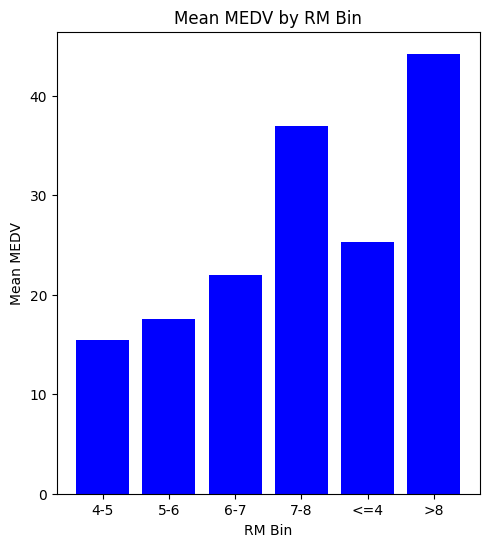

In [8]:
# Step 7: Create Visualizations
plt.figure(figsize=(12, 6))

# Bar chart for Mean_MEDV
plt.subplot(1, 2, 1)
plt.bar(result['RM_Bin'], result['Mean_MEDV'], color='blue')
plt.xlabel('RM Bin')
plt.ylabel('Mean MEDV')
plt.title('Mean MEDV by RM Bin')

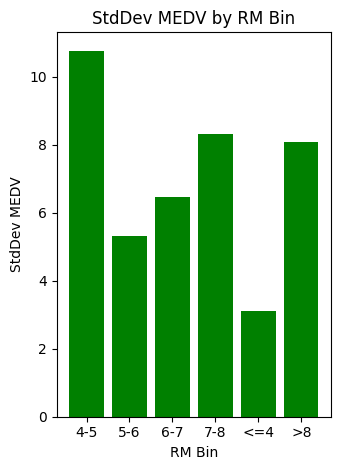

In [9]:
# Bar chart for StdDev_MEDV
plt.subplot(1, 2, 2)
plt.bar(result['RM_Bin'], result['StdDev_MEDV'], color='green')
plt.xlabel('RM Bin')
plt.ylabel('StdDev MEDV')
plt.title('StdDev MEDV by RM Bin')

plt.tight_layout()
plt.show()

# New Section